In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'

from superRes.fid_loss import *
from superRes.generators import *
from superRes.inception import InceptionV3
import geffnet
import time

In [3]:
path = Path('./dataset/')

path_fullRes = path/'DIV2K_train_HR'
path_lowRes = path/'DIV2K_train_LR_mild'

In [4]:
def det_DIV2k_data(bs:int, sz:int):
    lowResSuffix = 'x4m'
    src = ImageImageList.from_folder(path_lowRes).split_by_idxs(train_idx=list(range(0,800)), valid_idx=list(range(800,900)))

    data = (src.label_from_func(lambda x: path_fullRes/(x.name).replace(lowResSuffix, '')).transform(
            get_transforms(
                max_zoom=2.
            ),
            size=sz,
            tfm_y=True,
        ).databunch(bs=bs, num_workers=8, no_check=True).normalize(imagenet_stats, do_y=True))
    data.c = 3
    return data

In [5]:
data = det_DIV2k_data(bs=10, sz=256)
# data.show_batch()
x, y = data.one_batch()

In [6]:
x.shape

torch.Size([10, 3, 256, 256])

In [7]:
# f = fid(x, y)

In [8]:
# lam,f, l=f

In [9]:
# l.float()

In [10]:
# F.l1_loss(x,y)

In [11]:
bs=20
sz=128
lr = 1e-2
wd = 1e-3
keep_pct=1.0
epochs = 4
nf_factor = 2

model = geffnet.mobilenetv3_100

learn_gen = gen_learner_wide(data=data,
                             gen_loss=fid,
                             arch = model,
                             nf_factor=nf_factor)

In [15]:
learn_gen.fit_one_cycle(1, lr*10)

epoch,train_loss,valid_loss,time
0,0.744893,0.641117,14:30


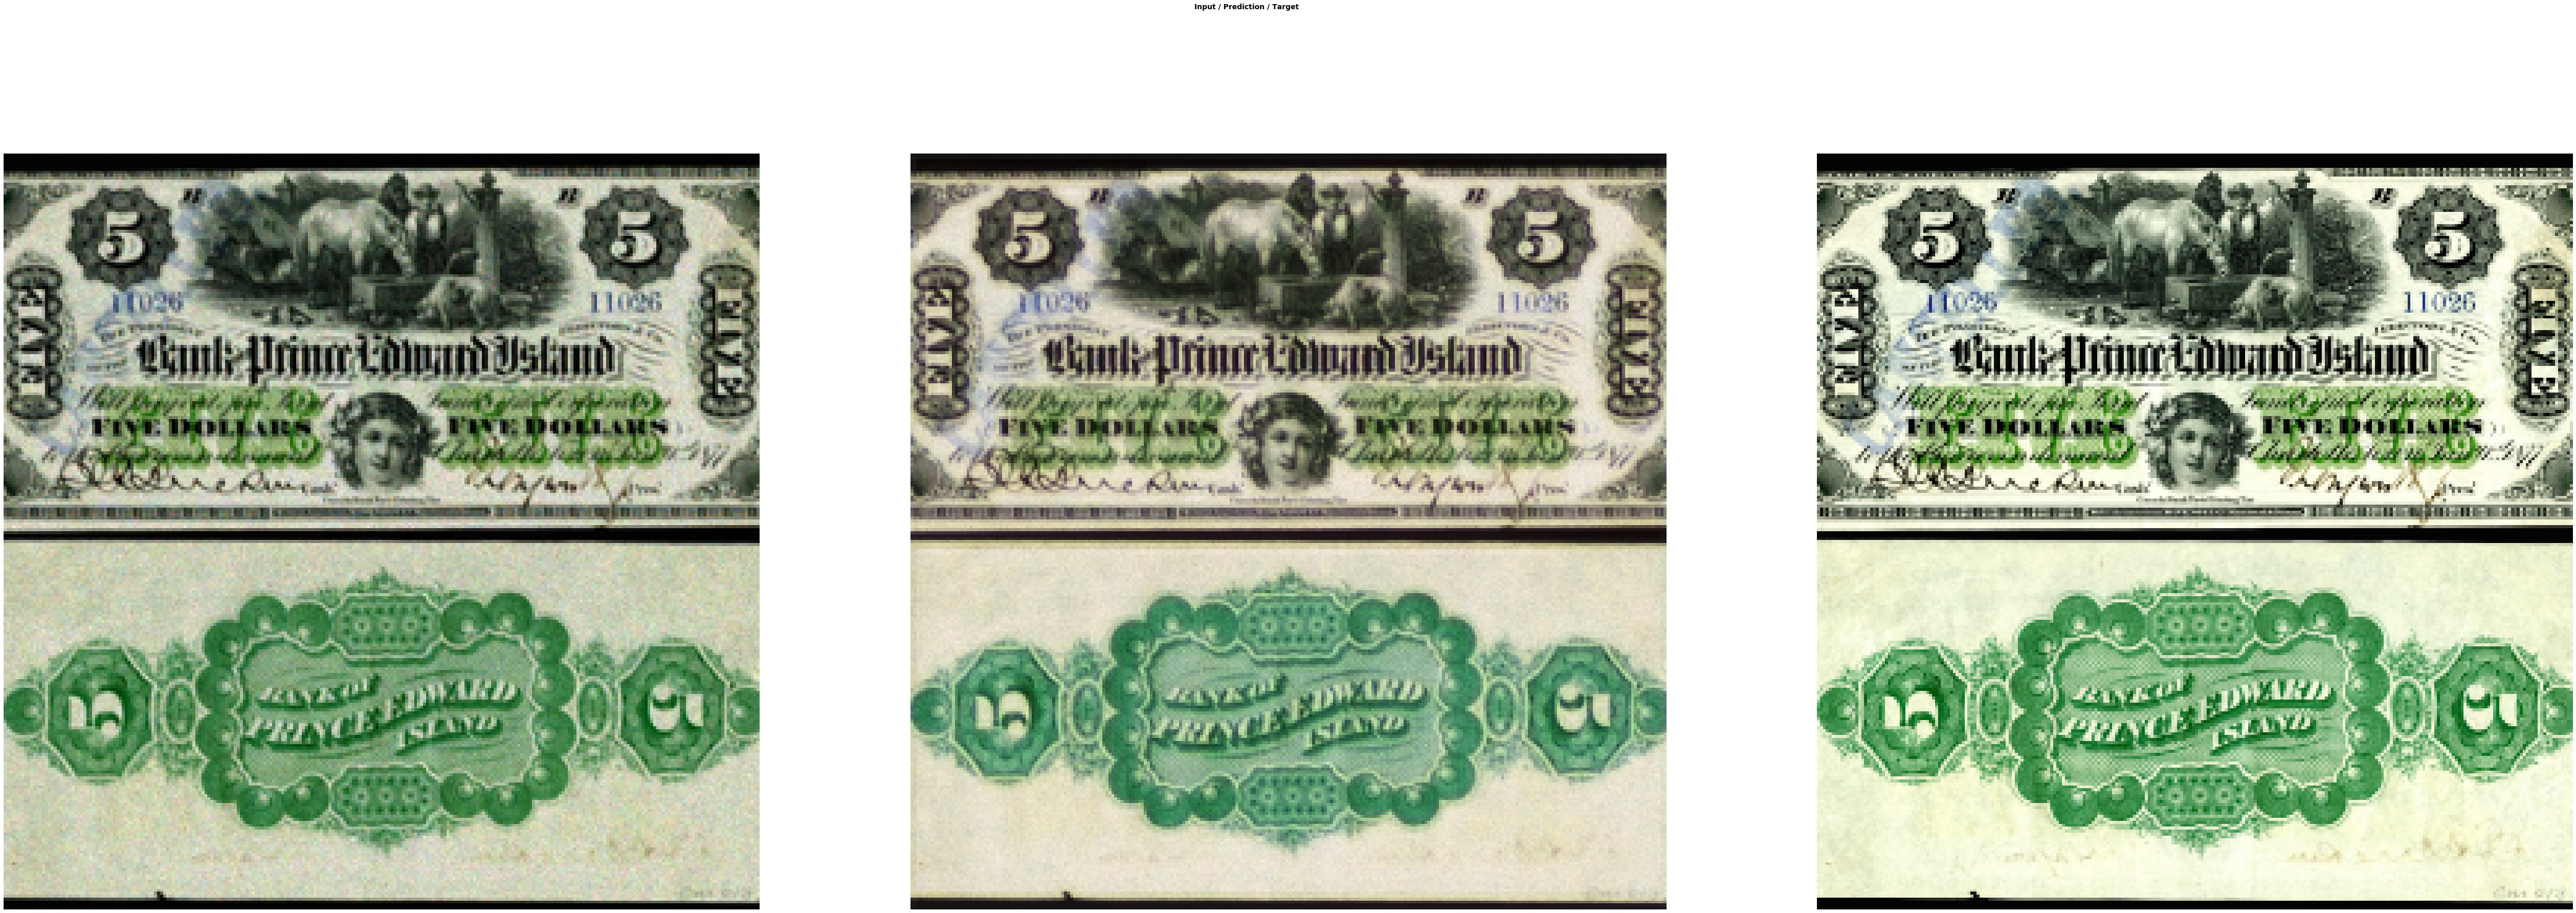

In [13]:
learn_gen.show_results(rows=1, imgsize=30)

In [16]:
learn_gen.unfreeze()

In [17]:
learn_gen.fit_one_cycle(1, lr)

epoch,train_loss,valid_loss,time
0,0.741771,0.620227,16:48


In [18]:
bs=10
sz=256
lr = 1e-2
wd = 1e-3
epochs = 5

In [20]:
data_gen = det_DIV2k_data(bs=10, sz=256)

In [21]:
learn_gen.data = data_gen
learn_gen.freeze()
gc.collect()

0

In [22]:
learn_gen.fit_one_cycle(1, lr)

epoch,train_loss,valid_loss,time
0,0.739407,0.670040,16:12


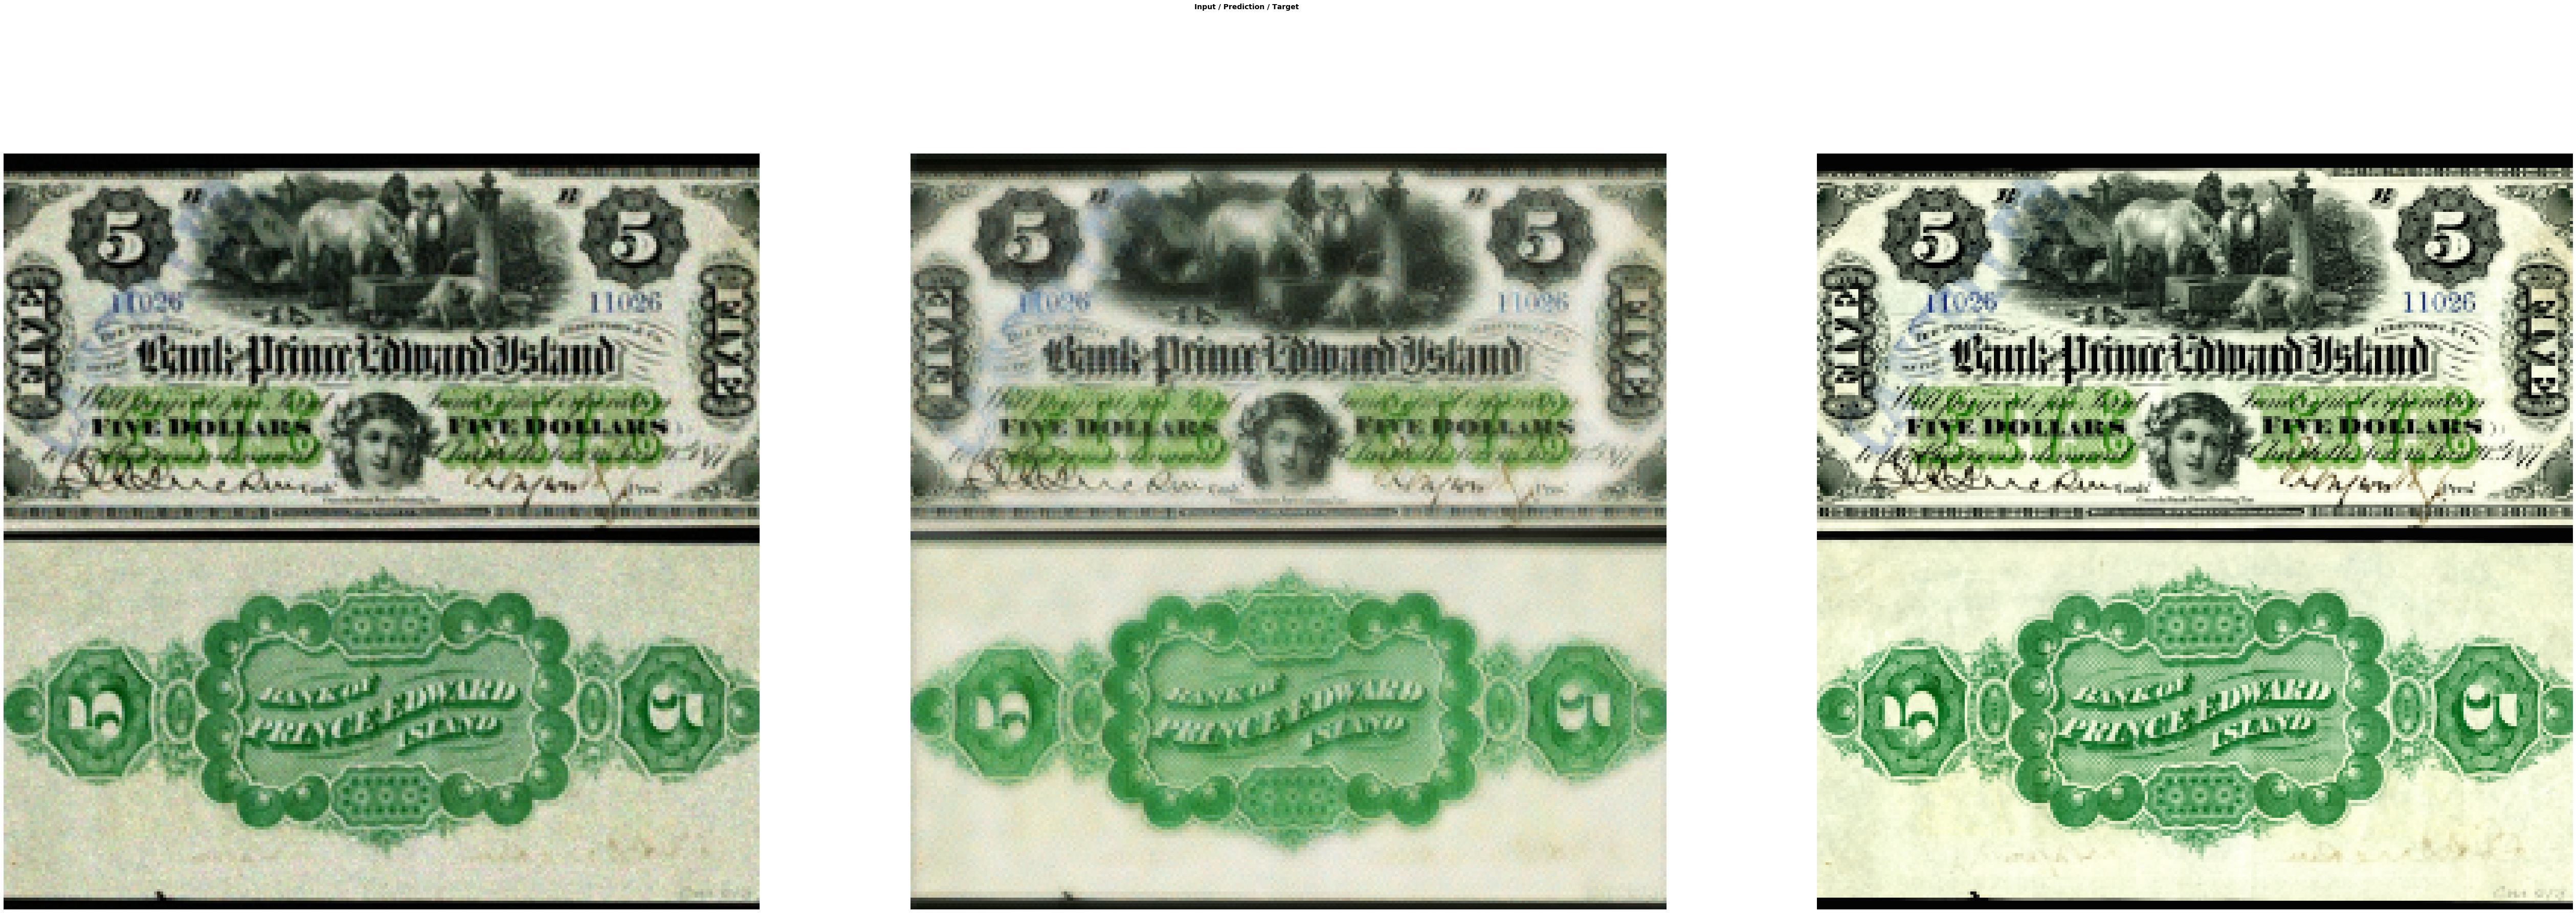

In [23]:
learn_gen.show_results(rows=1, imgsize=30)